In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import time
import pickle
from sklearn.tree import DecisionTreeClassifier

#library for regular expretion
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [2]:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/amazon_baby.csv",encoding='utf8')

Mounted at /content/drive


In [3]:

df.info()
df.head()
df=df.dropna() # to drop null values
df.drop('name', axis=1, inplace=True)
print("Initial Dataset Info")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB
Initial Dataset Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 182384 entries, 0 to 183530
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   review  182384 non-null  object
 1   rating  182384 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ MB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


 No. of Rating


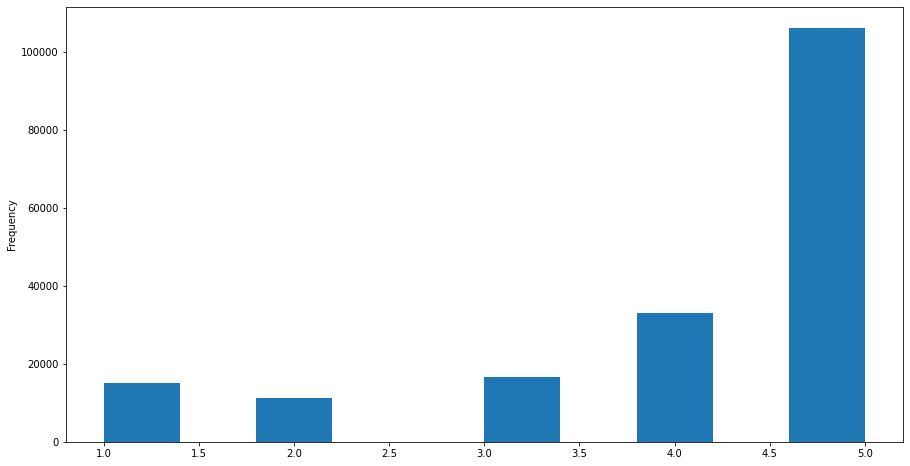

In [4]:
print(" No. of Rating")
df['rating'].plot(kind="hist",figsize=(15,8))

In [5]:
df["rating"] = df["rating"].replace([1,2],-1)
df["rating"] = df["rating"].replace([4,5],1)
df["rating"] = df["rating"].replace([3],0)
df

,review,rating
0,"These flannel wipes are OK, but in my opinion ...",0
1,it came early and was not disappointed. i love...,1
2,Very soft and comfortable and warmer than it l...,1
3,This is a product well worth the purchase. I ...,1
4,All of my kids have cried non-stop when I trie...,1
...,...,...
183526,Such a great idea! very handy to have and look...,1
183527,This product rocks! It is a great blend of fu...,1
183528,This item looks great and cool for my kids.......,1
183529,I am extremely happy with this product. I have...,1


In [6]:
df1=df.query('rating == 1')               
df1

,review,rating
1,it came early and was not disappointed. i love...,1
2,Very soft and comfortable and warmer than it l...,1
3,This is a product well worth the purchase. I ...,1
4,All of my kids have cried non-stop when I trie...,1
5,"When the Binky Fairy came to our house, we did...",1
...,...,...
183526,Such a great idea! very handy to have and look...,1
183527,This product rocks! It is a great blend of fu...,1
183528,This item looks great and cool for my kids.......,1
183529,I am extremely happy with this product. I have...,1


In [7]:
df2=df.query('rating == -1')               
df2

,review,rating
21,I only purchased a second-year calendar for my...,-1
41,This bear is absolutely adorable and I would g...,-1
50,This book is boring. Nothing to stimulate my g...,-1
70,The reason:Small sizeHard to apply on the wall...,-1
71,Would not purchase again or recommend. The dec...,-1
...,...,...
183414,"My infant goes to a really crappy daycare, and...",-1
183461,Pretty please open and inspect these stickers ...,-1
183463,Great 5-Star Product but An Obvious knock-off ...,-1
183472,When I received the item my initial thought wa...,-1


In [8]:
df3=df.query('rating == 0')               
df3

,review,rating
0,"These flannel wipes are OK, but in my opinion ...",0
13,I thought keeping a simple handwritten journal...,0
23,"Calendar is exactly as described, but I find t...",0
27,My son loves peek a boo at this age of 9 month...,0
34,"The book is cute, and we are huge fans of Lama...",0
...,...,...
183470,This iteam is kinda unstable but good for kids...,0
183474,My Daughter is almost 3 and loves bouncing on ...,0
183478,I bought this monitor recently in order to kee...,0
183511,I received a free sample from VIPU program for...,0


No. of Positive negative and neutral Reviews


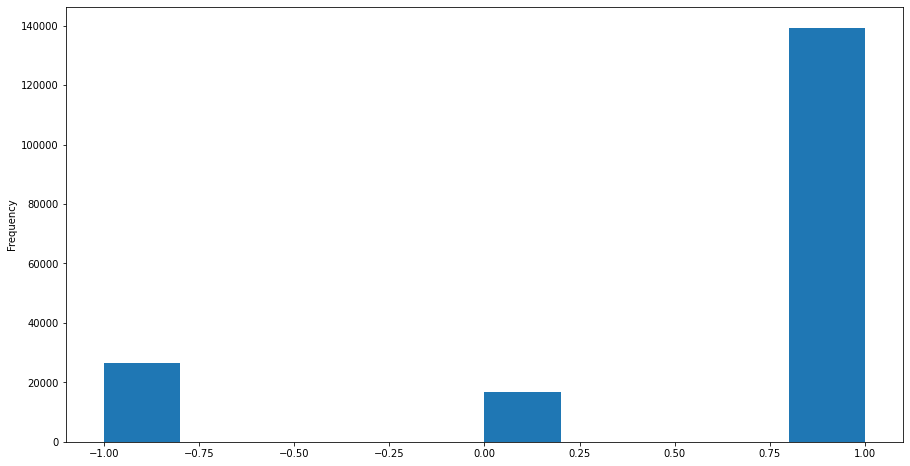

In [9]:
print('No. of Positive negative and neutral Reviews')
df['rating'].plot(kind="hist",figsize=(15,8))

From the Dataset we can se that the data is highly skewed towards positive rating.
We'll be balancing the dataset to have equal no. of Positive negative and neutral ratings.
Total Dataset has now 50,114 rows.  

In [10]:
df1 = df1.drop(df1.index[:122613])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16705 entries, 161876 to 183530
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  16705 non-null  object
 1   rating  16705 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 391.5+ KB


In [11]:
df2 = df2.drop(df2.index[:9656])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16705 entries, 61288 to 183503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  16705 non-null  object
 1   rating  16705 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 391.5+ KB


In [12]:
frames=[df1,df2,df3]
df=pd.concat(frames)

df=df.sample(frac=1, random_state=0)
df=df.reset_index(drop=True)
print("")
df

,review,rating
0,I am so fed up with spending hard earned money...,-1
1,I love this product and would highly recommend...,1
2,"Great price, quality, and comfort. Baby and mo...",1
3,It's clear that motorola rushed to get this to...,-1
4,I bought this for my five month old a few mont...,1
...,...,...
50110,Don't waste your money on this product. It mak...,-1
50111,If this fit our crib I think I would really li...,0
50112,I thought this would be an amazing product bc ...,0
50113,"It's not the perfect walker, it is almost impo...",0


 Equal no. positive, negative and netral


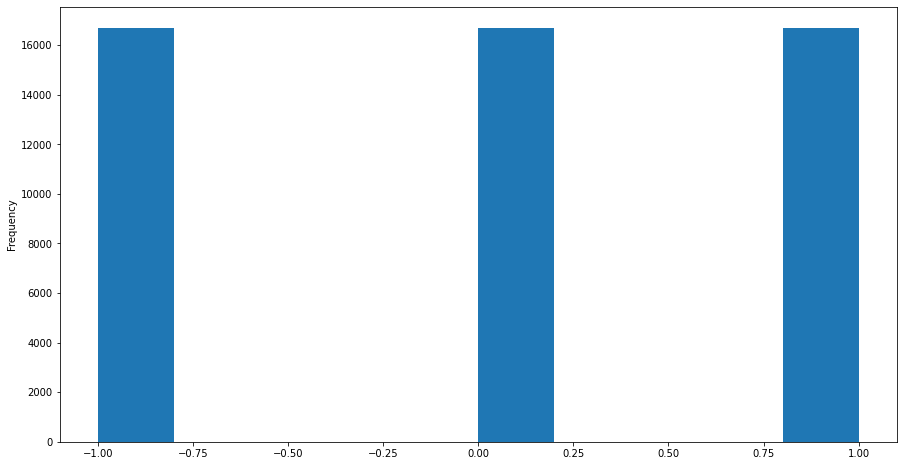

In [13]:
print(" Equal no. positive, negative and netral")
df['rating'].plot(kind="hist",figsize=(15,8))

In [16]:
def lemmatize_with_postag(text):
    sent = TextBlob(text)
    tag_dict = {"J": 'a', 
                "N": 'n', 
                "V": 'v', 
                "R": 'r'}
    words_and_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]    
    lemmatized_list = [wd.lemmatize(tag) for wd, tag in words_and_tags]
    return " ".join(lemmatized_list)

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def Preprocess(text):
  text=lemmatize_with_postag(text)
  text=remove_punctuations(text)
  text.str.lower()
  return text




In [15]:
df['review']=df['review'].apply(Preprocess)
df

,review,rating
0,I be so feed up with spending hard earn money ...,-1
1,I love this product and would highly recommend...,1
2,Great price quality and comfort Baby and mommy...,1
3,It s clear that motorola rush to get this to m...,-1
4,I buy this for my five month old a few month a...,1
...,...,...
50110,Do nt waste your money on this product It make...,-1
50111,If this fit our crib I think I would really li...,0
50112,I think this would be an amazing product bc of...,0
50113,It s not the perfect walker it be almost impos...,0


In [17]:
df['review']=df['review'].str.lower() 

In [18]:
x=df['review']
y=df['rating']
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y ,test_size=0.5, random_state=42)

In [19]:
CV=CountVectorizer(ngram_range=(1,2),stop_words='english',max_df=0.75,binary=True)
X_train=CV.fit_transform(x_train)
X_test=CV.transform(x_test)

In [20]:
print(X_train.shape)
print('')
print(X_test.shape)

(25057, 485127)

(25058, 485127)


In [21]:
from sklearn.model_selection import GridSearchCV
import random
c_space = np.logspace(0.00,2.99,15)
param_grid = {'alpha': c_space}

In [44]:
mnb = MultinomialNB()
mnb_cv = GridSearchCV(mnb, param_grid, cv = 10)


mnb_cv.fit(X_train,y_train)

print("Tuned Multinomial NaiveBayes Parameters: {}".format(mnb_cv.best_params_)) 
print("Best score is {}".format(mnb_cv.best_score_))

Tuned Multinomial NaiveBayes Parameters: {'alpha': 1.635202071294052}
Best score is 0.6624094986403888


In [22]:
mnbfinal=MultinomialNB(alpha= 1.635202071294052)
mnbfinal.fit(X_train,y_train)
result=mnbfinal.predict(X_test)
print(result)

[0 1 0 ... 0 1 0]


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, result)
print(cm)
print('')
accuracy_score(result,y_test)*100

[[5096 2968  288]
 [1664 5857  832]
 [ 562 2238 5553]]



65.87117886503312

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


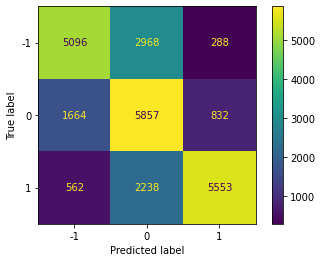

In [24]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(mnbfinal, X_test, y_test)  
plt.show()

In [26]:
report = classification_report(y_test, result)
print('Naive Bayes 3 Class Classification Report:', report, sep='\n\n')

Naive Bayes 3 Class Classification Report:

              precision    recall  f1-score   support

          -1       0.70      0.61      0.65      8352
           0       0.53      0.70      0.60      8353
           1       0.83      0.66      0.74      8353

    accuracy                           0.66     25058
   macro avg       0.69      0.66      0.66     25058
weighted avg       0.69      0.66      0.66     25058



In [110]:
from scipy.stats import randint

from sklearn.model_selection import RandomizedSearchCV
  
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(X_train, y_train)
  
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.4212793068338243


In [27]:
DTC=DecisionTreeClassifier(criterion= 'entropy', max_features= 6, min_samples_leaf= 1)
DTC.fit(X_train,y_train)
result1=DTC.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
cm = confusion_matrix(y_test, result1)
print(cm)
print(result1)
accuracy_score(result1,y_test)*100

[[3310 2597 2445]
 [2586 2959 2808]
 [1876 2266 4211]]
[ 1 -1  0 ... -1  0  0]


41.82297070795754

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


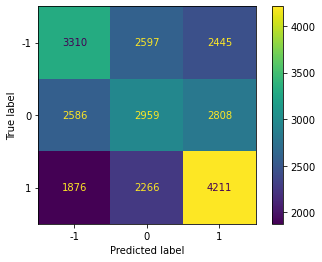

In [29]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(DTC, X_test, y_test)  
plt.show()

In [30]:
report = classification_report(y_test, result1)
print('Decision Tree 3 Class Classification Report:', report, sep='\n\n')

Decision Tree 3 Class Classification Report:

              precision    recall  f1-score   support

          -1       0.43      0.40      0.41      8352
           0       0.38      0.35      0.37      8353
           1       0.44      0.50      0.47      8353

    accuracy                           0.42     25058
   macro avg       0.42      0.42      0.42     25058
weighted avg       0.42      0.42      0.42     25058



In [65]:
import joblib
accuracy_score(result1,y_test)
pickle.dump(DTC, open('DecisionTree1', 'wb'))

In [114]:
def predict_sent(a):
    test = CV.transform(a)
    pred= DTC.predict(test)
    
    if pred == 1:
        return 'Positive'
    elif pred == -1:
        return 'Negative'
    else:
        return 'no class found'

In [124]:
x=[" product"]
r = predict_sent(x)
print (r)

Positive


In [85]:
DT = pickle.load(open('DecisionTree1', 'rb'))
NB = pickle.load(open('Multinomialnb', 'rb'))

def predict_sentiment(a):
    
    test = CV.transform(a)
    pred= NB.predict(test)
    
    
    if pred == 1:
        return 'Positive'
    elif pred == -1:
        return 'Negative'
    else:
        return 'Neutral'

In [92]:
x=["she did fuck me excellent"]

r = predict_sentiment(x)
print (r)

Positive
